In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

# Summary

The notebook `yieldWidthComputationI.ipynb` mentioned that the exact ionization yield width computation for the GGA3 detector of the EDELWEISS publication [[EDW2004][EDW2004]] was computationally slow. In fact it takes about 1 min to evaluate the yield width for a single energy. Since our fitting will require several thousand function evaluations we sought a way to compute the yield widths of the electron recoil and nuclear recoil bands much more quickly. The *moment expansion* is the method that we use and it was also employed in the original EDELWEISS publication. 

This notebook explains the moment expansion and compares our version to the slightly less accurate version presented in the original EDELWEISS publication. We need to apply some corrections to the nuclear recoil band version of this expansion in order so that the overall deviation from the exact calculation is kept small. 


[EDW2004]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 resolution paper"

# The Moment Expansion

The notebook `yieldWidthComputationI.ipynb` showed the definitions of measured recoil energy and measured ionization yield, they are repeated below for convenience:

\begin{equation}
\tilde{E}_r = E_r + \chi \delta H - \Omega \delta I,
\end{equation}

\begin{equation}
Q = \frac{\epsilon N + \delta I}{E_r + \chi \delta H - \Omega \delta I}.
\end{equation}

Here, we have made the following definitions for brevity:

\begin{equation}
\chi \equiv \left(1 + \frac{V}{\epsilon_{\gamma}}\right),
\end{equation}

\begin{equation}
\Omega \equiv \left(\frac{V}{\epsilon_{\gamma}}\right).
\end{equation}

In what follows--like in the exact computations presented in `yieldWidthComputationI.ipynb`--it is important to note that the random variables $\delta H$, $\delta I$, and $N$ are independent (have covariances of *zero*) and are all plausibly modeled as normally distributed.

In this research we are constructing methods to measure $\sigma_N$ for nuclear recoils given knowledge of $\sigma_I$ and $\sigma_H$, along with experimental measurements of $\sigma_Q$.

As in the exact calculation we can compute $\sigma_Q$ from its definition:

\begin{equation}
\sigma_Q^2 = E[Q^2] - E[Q]^2, 
\end{equation}

where the $E[\cdot]$ is the *expectation* of a quantity given its distribution. 

The previous exact calculations were focused on finding the true PDF of $Q$, i.e. its distribution function at a given measured energy ($f_Q(Q|\tilde{E}_r)$). With that distribution the appropriate integrals are computed to arrive at the variance ($\sigma_Q^2(\tilde{E}_r)$) as defined above.

In the *moment expansion* each expectation value $E[Q]$ and $E[Q^2]$ are computed by doing a multi-dimensional Taylor Expansion of the definition of $Q$ and then taking the expectation values, inserting the appropriate values for quantities like $E[N]$ or $E[(\delta H)^2]$. 

## Computing the Moments

Approximating the following expectations is what we need to do.

\begin{equation}
E[Q] = E\left[\frac{\epsilon N + \delta I}{E_r + \chi \delta H - \Omega \delta I}\right]
\end{equation}

\begin{equation}
E[Q^2] = E\left[\left(\frac{\epsilon N + \delta I}{E_r + \chi \delta H - \Omega \delta I}\right)^2\right]
\end{equation}

The nonlinear functions inside the expectations are replaced with their Taylor Expansions about the means, this is the essence of the moment expansion [[MEWiki][MEWiki]]. 

When the Taylor Expansion is made it leaves the relevant expectation values in the following form:

\begin{equation}
E[Q]^2 = E\left[\left( \bar{Q} + Q_H \delta H + Q_I \delta I + Q_N \left(N-\bar{N}\right) \ldots \right) \right]^2,
\end{equation}

\begin{equation}
E[Q^2] = E\left[\left( \bar{Q} + Q_H \delta H + Q_I \delta I + Q_N \left(N-\bar{N}\right) \ldots \right) \left( \bar{Q} + Q_H \delta H + Q_I \delta I + Q_N \left(N-\bar{N}\right) \ldots \right)\right].
\end{equation}

Here we have used several facts to simplify the expressions inside the expectations slightly. First, the means of the $\delta H$ and $\delta I$ RVs are zero. Next, the notation $Q_I$ or $Q_H$ are shorthand for the first partial derivatives of $Q$ with respect to $\delta I$ and $\delta H$ respectively, evaluated at the mean values for all the RVs. Last, the quantity $\bar{N}$ is simply $E_r\bar{Q}/\epsilon_{\gamma}$ or, in words, the number of electron hole pairs produced by a recoil at a given recoil energy is the average ionization yield evaluated at that energy times the recoil energy and divided by the average electron-equivalent energy to create a single electron-hole pair ($\epsilon_{\gamma}$). 

Because all the basic RVs are normally distributed and independent, there are a number of other simplifications. 

  * All covariances are zero--this greatly reduces the number of terms that contribute to $E[Q^2]$. 
  * All RVs have only even central moments non-zero, and those are related to the second central moment in a well-defined way. 
  * Most terms in $E[Q]^2$ have counterpart terms in $E[Q^2]$ which will perfectly cancel after subtraction. Some examples are terms that involve the leading $\bar{Q}$ of the expansion. 
  * All terms involving derivatives of $N$ will involve the effective nuclear recoil Fano factor and will vanish if we do not include this (like when evaluating the yield width for electron recoils where the "Fano" part of $\sigma_N$ is implicitly included in the resolutions and very small). *__This fact will be important in the extraction of the effective Fano factor in this work__*. 
  
  

[MEWiki]: https://en.wikipedia.org/wiki/Taylor_expansions_for_the_moments_of_functions_of_random_variables "Wikipedia entry for the Moment Expansion"

## Results

Note that the resolutions from the EDELWEISS paper are relative to the keVee scale, but we want these, instead, to be quoted as a function of the true recoil energy, $E_r$, for a given ionization yield model. We can use the yield model used in the Edelweiss paper:

\begin{equation}
\bar{Q}(E_r) = aE_r^b,
\end{equation}

with a=0.16 and b=0.18. In terms of the average ionization yield, the conversion of the resolution functions to the $E_r$ scale can be accomplished by transforming the $E_r$ energy into the _electron equivalent_ energy for ionization ($E_{\mathrm{ee}}^I$) or heat ($E_{\mathrm{ee}}^h$). 

\begin{equation}
E_{\mathrm{ee}}^h = \frac{\left(1+ \frac{V}{\epsilon}\bar{Q}\right)E_r}{1+\frac{V}{\epsilon}}
\end{equation}

\begin{equation}
E_{\mathrm{ee}}^I = \bar{Q}E_r
\end{equation}

Note that these two definitions are equivalent when the average ionization yield is one (like for electron-recoils), but differs when the average ionization yield is not one. This underscores the fact that heat and ionization scales cannot be universally (for all recoil types) defined because the average ionization yield does not affect "primary" phonon production and Luke-Neganov phonon production [[Luke88][Luke88]][[Neganov85][Neganov85]] in the same way. 

[Luke88]: https://doi.org/10.1016/0168-9002(90)91510-I "Voltage amplification I"
[Neganov85]: https://link.springer.com/article/10.1134/1.1423744 "Voltage amplification II:"

__Note: [[Neganov85][Neganov85]] is not the correct reference, search for the reference B. Neganov and V. Trofimov, Otkrytiya, Izobret.146, 215(1985), which is cited there; but it's hard to find electronically.__

# Convergence

The moment expansion is a formal tool but it is not known to converge to the correct full expression that we've derived in `yieldWidthComputationI.ipynb`. In fact it may not converge at all but rather be asymptotic. We then want to show that it is a good enough expression for our purposes if we take it to a finite order. 

The first comparison would be the lowest non-trivial order for the expression (used in the EDELWEISS paper [[EDW2004][EDW2004]]) and our higher order approximation for Electron Recoils. 

[EDW2004]: https://doi.org/10.1016/j.nima.2004.04.218 "EDELWEISS 2004 resolution paper"

In [5]:
import prob_dist as pd
import fano_calc as fc
import EdwRes as er
import time
import imp
imp.reload(pd)

#get the resolutions                                                                              
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = \
 er.getEdw_det_res('GGA3',4.0,'data/edw_res_data.txt',aH=0.0381,C=None) 

fF = pd.QEr_v2_2D_fast(sigHv,sigIv,4.0,3.0,0.00000001,Qbar=lambda x: 0.16*x**0.18)                            
gF = pd.expband_2D(fF,(1/18.0),1.5)

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5')


GGA3/ER/4.0/1.000E-04/0.0381/000/


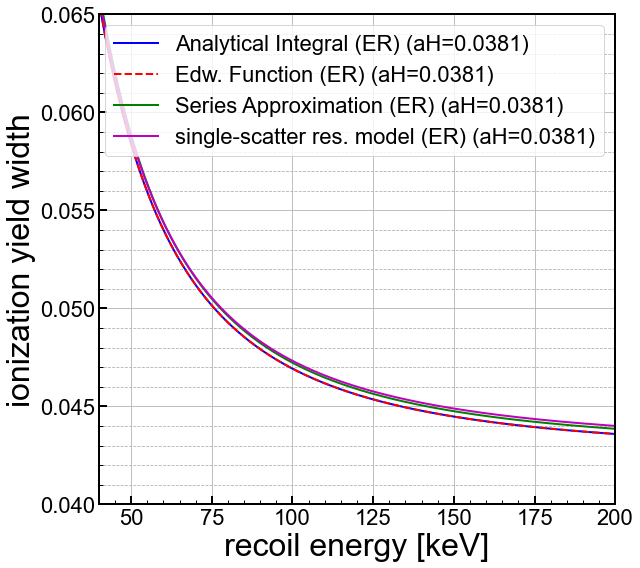

In [26]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))
ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='Edw. Function (ER) (aH={})'.format(0.0381))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))
ax1.plot(E,sig,color='m',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(0.0381))
#print(E,sig)

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




#ymin = 0.5
#ymax = 0.65
ymin = 0.04
ymax = 0.065



ax1.set_yscale('linear')
#ax1.set_yscale('log')
#ax1.set_xlim(3, 4) 
ax1.set_xlim(40,200)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('pics/analytic_integral0.png')
plt.show()


In [32]:
import scipy.interpolate as inter

sig_exact_interp = inter.InterpolatedUnivariateSpline(E, sig , k=3)

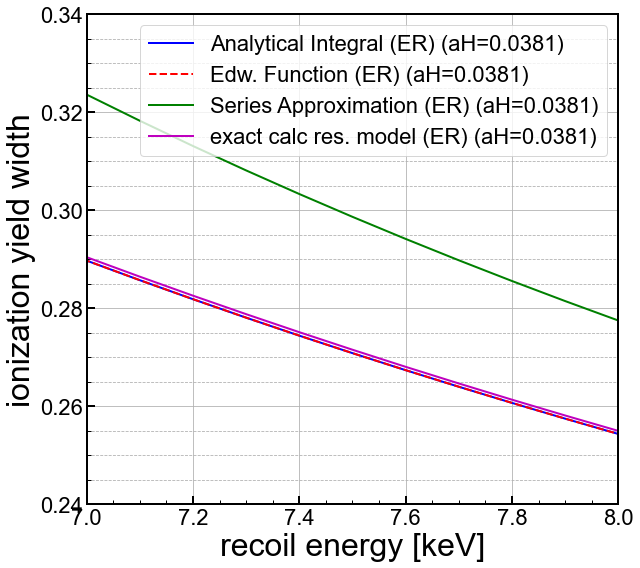

In [34]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))
ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='Edw. Function (ER) (aH={})'.format(0.0381))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))
#ax1.plot(E,sig,color='m',linestyle="-",linewidth=2, \
#         label='single-scatter res. model (ER) (aH={})'.format(0.0381))
ax1.plot(X,sig_exact_interp(X),color='m',linestyle="-",linewidth=2, \
         label='exact calc res. model (ER) (aH={})'.format(0.0381))
#print(E,sig)

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.24
ymax = 0.34




ax1.set_yscale('linear')
#ax1.set_yscale('log')
#ax1.set_xlim(3, 4) 
ax1.set_xlim(7,8)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('ionization yield width')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('pics/analytic_integral0.png')
plt.show()

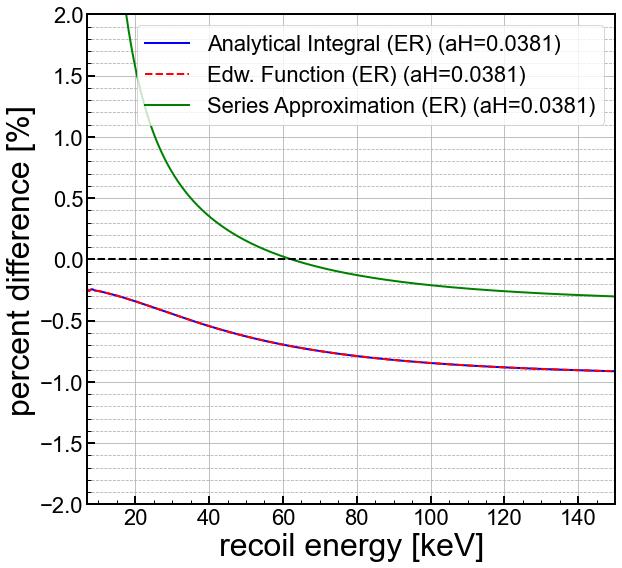

In [39]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

analytical_NRQ_var_rel = 100*(np.sqrt(pd.analytical_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)) - sig_exact_interp(X)) \
         /sig_exact_interp(X)
sigQerv_rel = 100*(sigQerv(X) - sig_exact_interp(X)) \
         /sig_exact_interp(X)
series_NRQ_var_rel = 100*(np.sqrt(pd.series_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)) - sig_exact_interp(X)) \
         /sig_exact_interp(X)

ax1.plot(X,analytical_NRQ_var_rel,color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))
ax1.plot(X,sigQerv_rel,color='r',linestyle="--",linewidth=2, \
         label='Edw. Function (ER) (aH={})'.format(0.0381))
ax1.plot(X,series_NRQ_var_rel,color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))
#ax1.plot(E,sig,color='m',linestyle="-",linewidth=2, \
#         label='single-scatter res. model (ER) (aH={})'.format(0.0381))
#ax1.plot(X,sig_exact_interp(X),color='m',linestyle="-",linewidth=2, \
#         label='exact calc res. model (ER) (aH={})'.format(0.0381))
#print(E,sig)

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)

ax1.axhline(0.0,color='k',linestyle="--")




ymin = -2
ymax = +2




ax1.set_yscale('linear')
#ax1.set_yscale('log')
#ax1.set_xlim(3, 4) 
ax1.set_xlim(7,150)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('percent difference [%]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('pics/sigER_app.png')
plt.show()